# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>
### Bigoni Stefano, 961886
### Exercize 02.1


In this Exercise I will compute the integral
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
in two ways, sampling a uniform distribution and using the importance sampling technique in the interval $[0,1]$.
For the second I chose a simple line with normalized area in $[0,1]$ as sampling p.d.f.: $$ p(x) = 2-2x.$$
![alt text](imp-sampling.png "Logo Title Text 1")
The resulting cumulative distribution function is $$F(x) = \int_0^xp(x)dx = 2x-x^2 .$$
Therefore, if $y$ is a uniformly distributed random variable in $[0,1]$, a random variable $x$ distributed according to $p(x)$ is obtained as $$x = 1-\sqrt{1-y}.$$



In the plots below are shown the cumulative average values and the correspondent errors for 100 blocks of $10^3$ throws each, for both computation techniques. 

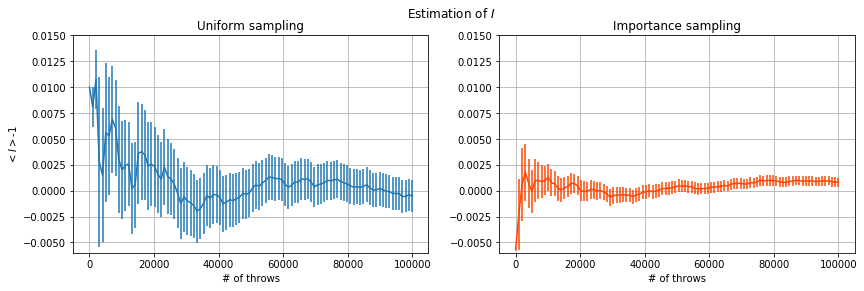

In [4]:
import matplotlib.pyplot as plt
import numpy as np

output = open("uniform.dat","r")
M = int(output.readline())
output.close()

data = np.loadtxt(fname = "uniform.dat",skiprows=1)
r = data[:,0]
err = data[:,1]
N = np.size(r)
x = np.linspace(1,M,N)

data2 = np.loadtxt(fname = "importance.dat",skiprows=1)
r2 = data2[:,0]
err2 = data2[:,1]

fig = plt.figure(figsize=(14,4))

plt.subplot(1,2,1)

plt.errorbar(x,r-1,yerr=err)
plt.title("Uniform sampling")
plt.xlabel("# of throws")
plt.ylabel("$<I>$-1")
plt.ylim([-0.006,0.015])
plt.grid(True)

plt.subplot(1,2,2)

plt.errorbar(x,r2-1,yerr=err2,color='orangered')
plt.title("Importance sampling")
plt.xlabel("# of throws")
#plt.ylabel("$<I>$-1")
plt.ylim([-0.006,0.015])
plt.grid(True)

plt.suptitle("Estimation of $I$")
plt.show()

3D Random Walk

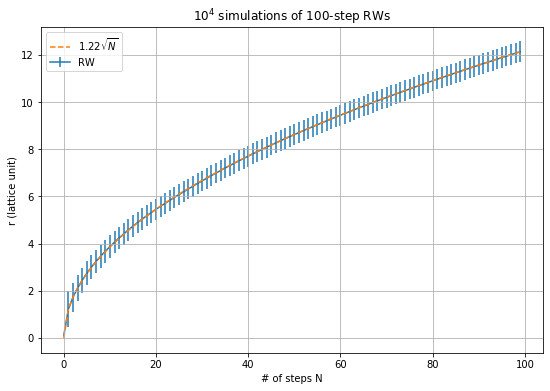

In [19]:
output = open("RWdiscrete.dat","r")
M = int(output.readline())
output.close()

data = np.loadtxt(fname = "RWdiscrete.dat",skiprows=1)
r = data[:,0]
err = data[:,1]
N = np.size(r)
x = np.arange(0,100)

err_sqrt = np.zeros(N)
err_sqrt[0] = 0;
err_sqrt[1:] = (0.5/x[1:]**0.5)*err[1:] #error propagation

plt.figure(figsize=[9,6])
plt.errorbar(x,r**0.5,yerr=err_sqrt,zorder=0)
plt.plot(x,1.22*x**0.5,"--",zorder=1) #fit
plt.grid(True)
plt.xlabel("# of steps N")
plt.ylabel("r (lattice unit)")
plt.legend(["$1.22\sqrt{N}$","RW"])
plt.title("$10^4$ simulations of 100-step RWs")
plt.show()

This plot shows the extremely good accordance of the N-dependence of $\sqrt{\left<|\vec{r}|_N^2\right>}$ with the predicted diffusive dependence $f(N)=k\sqrt{N}$. In this case the best value of the parameter was estimated as $k=1.22$.

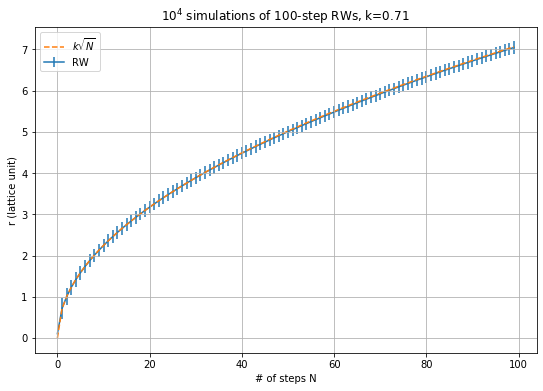

In [17]:
output = open("RWcont.dat","r")
M = int(output.readline())
output.close()

data = np.loadtxt(fname = "RWcont.dat",skiprows=1)
r = data[:,0]
err = data[:,1]
N = np.size(r)
x = np.arange(0,100)

err_sqrt = np.zeros(N)
err_sqrt[0] = 0;
err_sqrt[1:] = (0.5/x[1:]**0.5)*err[1:] #error propagation

plt.figure(figsize=[9,6])
plt.errorbar(x,r**0.5,yerr=err_sqrt,zorder=0)
plt.plot(x,0.71*x**0.5,"--",zorder=1) #fit
plt.grid(True)
plt.xlabel("# of steps N")
plt.ylabel("r (lattice unit)")
plt.legend(["$0.71\sqrt{N}$","RW"])
plt.title("$10^4$ simulations of 100-step RWs")
plt.show()